In [1]:
import numpy as np
from src.layers.dense import DenseLayer
from src.model import Model
from src.optimizers import gradient_descent
from src.metrics import accuracy_binary_ce 


In [2]:
# Generate Dataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

N_SAMPLES = 2000
TEST_SIZE = 0.2

X, y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=42)
y = np.expand_dims(y,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1600, 2) (1600, 1)
(400, 2) (400, 1)


In [3]:
layers = [
    DenseLayer(nodes_prev=2,  nodes_curr=25, activation="relu"),
    DenseLayer(nodes_prev=25, nodes_curr=50, activation="relu"),
    DenseLayer(nodes_prev=50, nodes_curr=50, activation="relu"),
    DenseLayer(nodes_prev=50, nodes_curr=25, activation="relu"),
    DenseLayer(nodes_prev=25, nodes_curr=1, activation="sigmoid")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent,
    costfn="BCE"
)


In [4]:
history = model.fit(X_train, y_train, epoch=50, lr=0.001, bs=1)


Iteration: 1	 cost: 0.69124	accuracy: 71.38%
Iteration: 5	 cost: 0.68479	accuracy: 81.88%
Iteration: 10	 cost: 0.59217	accuracy: 82.06%
Iteration: 15	 cost: 0.28728	accuracy: 87.50%
Iteration: 20	 cost: 0.25980	accuracy: 88.31%
Iteration: 25	 cost: 0.22118	accuracy: 90.06%
Iteration: 30	 cost: 0.14865	accuracy: 94.19%
Iteration: 35	 cost: 0.09534	accuracy: 96.25%
Iteration: 40	 cost: 0.08294	accuracy: 96.56%
Iteration: 45	 cost: 0.07990	accuracy: 96.69%
Iteration: 50	 cost: 0.07883	accuracy: 96.75%


In [5]:
accuracy_binary_ce(y=y_test, y_hat=model.predict(X_test))

0.965

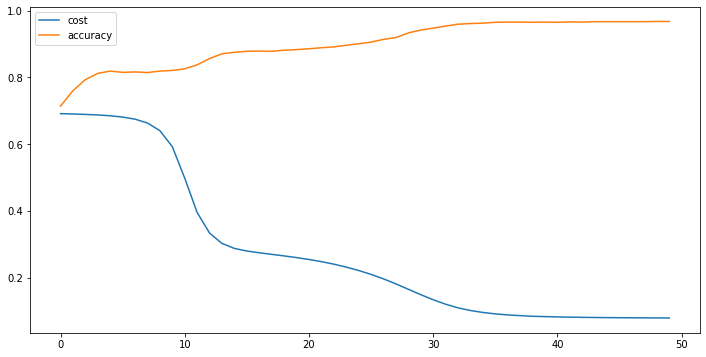

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
plt.plot(history)
plt.legend(['cost', 'accuracy'])
plt.show()
